In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("udemy_courses.csv", parse_dates=['published_timestamp'])

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [4]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


# Missing Values 

In [24]:

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
course_id,course_id,0.0
course_title,course_title,0.0
url,url,0.0
is_paid,is_paid,0.0
price,price,0.0
num_subscribers,num_subscribers,0.0
num_reviews,num_reviews,0.0
num_lectures,num_lectures,0.0
level,level,0.0
content_duration,content_duration,0.0


# EDA

In [5]:
df.price.value_counts()[:10]

20     830
50     468
0      310
200    295
40     217
30     166
25     154
95     152
100    133
195    127
Name: price, dtype: int64

<AxesSubplot:ylabel='is_paid'>

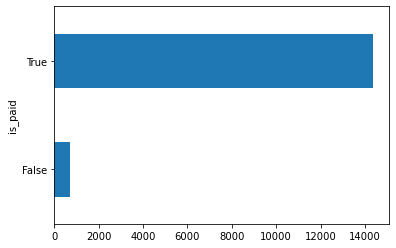

In [6]:
df.groupby(['is_paid'])['content_duration'].sum().plot(kind="barh")

<AxesSubplot:xlabel='price'>

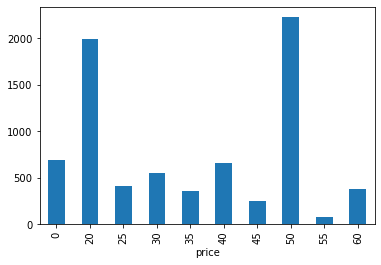

In [7]:
df.groupby(['price'])['content_duration'].sum()[:10].plot(kind="bar")

(-1.1171241863074404,
 1.1088073548996615,
 -1.1097707916507145,
 1.1161607495563874)

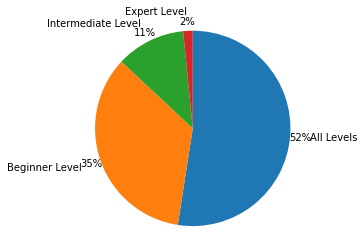

In [8]:
import matplotlib. pyplot as plt

sorted_counts = df['level'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);
plt.axis('square')

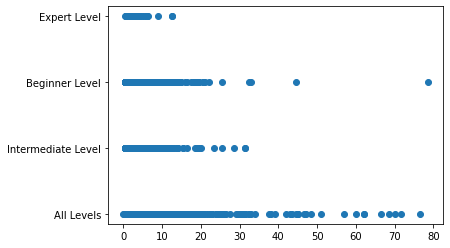

In [9]:
plt.scatter(data = df, x = 'content_duration', y = 'level')

<AxesSubplot:>

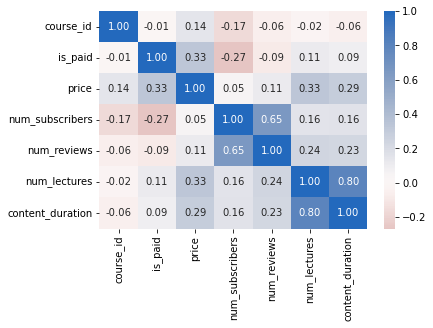

In [10]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

<AxesSubplot:xlabel='num_subscribers', ylabel='num_reviews'>

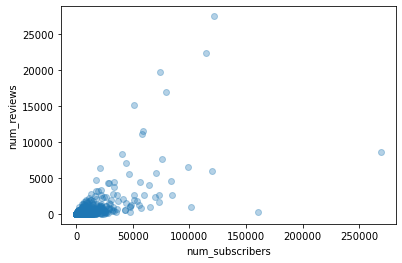

In [11]:
sns.regplot(data = df, x = 'num_subscribers', y = 'num_reviews', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

In [12]:
df['year'] = pd.DatetimeIndex(df['published_timestamp']).year

/Users/itsmuriuki/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

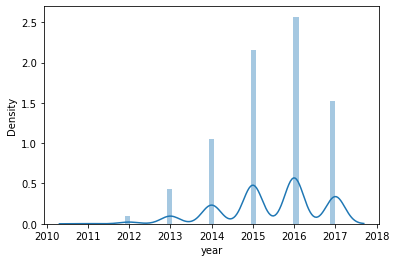

In [13]:
sns.distplot(df['year'])

<AxesSubplot:xlabel='year', ylabel='num_subscribers'>

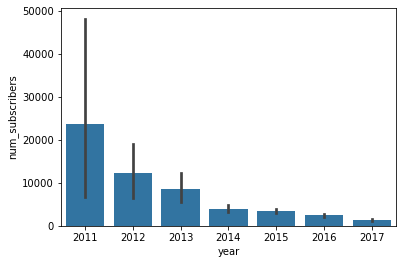

In [14]:
base_color = sns.color_palette()[0]
sns.barplot(data = df, x = 'year', y = 'num_subscribers', color = base_color)

<AxesSubplot:xlabel='count', ylabel='subject'>

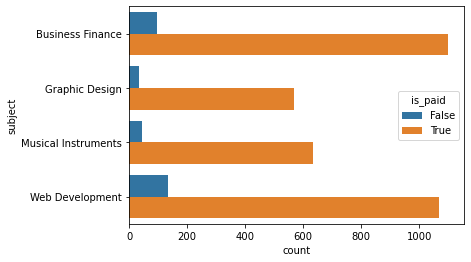

In [15]:
sns.countplot(data = df, y = 'subject', hue = 'is_paid')

In [16]:
level_by_year=df.groupby('year')['level'].value_counts().reset_index(level=0).rename(columns={'level':'level count'}, index={'index':'Level_of_Courses'})
level_by_year

,year,level count
level,,
All Levels,2011,5
All Levels,2012,33
Beginner Level,2012,9
Intermediate Level,2012,3
All Levels,2013,102
Beginner Level,2013,73
Intermediate Level,2013,18
Expert Level,2013,9
All Levels,2014,272


In [26]:
fig=px.line(level_by_year, x='year', y='level count', color=level_by_year.index, title='Udemy Courses by level in each year')
fig.show()

In [30]:
fig = px.scatter(df,x = df['price'], y = df['content_duration'],
           hover_data = ['course_title'],color=df["subject"])

fig.update_xaxes(title='Price')
fig.update_yaxes(title='Content Duration',showticklabels=False)
fig.show()

# To do

## Model

In [ ]:
# Build a random Forest Classifer to predict which course will be Paid for or Not

In [25]:
# Measure performance using a confusion matrix 